In [1]:
import pandas as pd
import numpy as np

In [2]:
data_frame=pd.read_csv('final_data.csv')

/var/folders/4b/082wp8yj1vdb15yd5756bphm0000gn/T/ipykernel_3245/1724482810.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame=pd.read_csv('final_data.csv')


In [3]:
data_frame['Latitude']=data_frame['Latitude'].astype(str).str.replace("'",'').astype('float64')

In [4]:
data_frame['Longitude']=data_frame['Longitude'].astype(str).str.replace("'",'').astype('float64')

In [5]:
data_frame.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,FBI Code,Year,Updated On,Latitude,Longitude,Location,street_num,street_name,only_sn,address
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,08A,2007,08/17/2015 03:03:40 PM,42.015799,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE"
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,01A,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,01A,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,05,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",True,False,632,08B,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"41.737750767,-87.604855911",86,086 S COTTAGE GROVE AVE,S COTTAGE GROVE AVE,"632, S COTTAGE GROVE AVE"


In [6]:
#Has the over all crime rate in chicago increased, decreased, or remained stable in recent years.

In [7]:
#to answer this, we need to create a line plot based on years

In [30]:
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
#extracting year from Date

In [12]:
data_frame['Only date']=data_frame['Date'].str.split(' ').str[0]

In [20]:
data_frame['month']=data_frame['Only date'].str.split('/').str[0].astype(int)
data_frame['day']=data_frame['Only date'].str.split('/').str[1].astype(int)
data_frame['year']=data_frame['Only date'].str.split('/').str[2].astype(int)

In [21]:
data_frame.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,False,False,2422,...,-87.675756,"42.0157992, -87.6757558",74,074 N ROGERS AVE,N ROGERS AVE,"2422, N ROGERS AVE",08/25/2007,8,25,2007
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,...,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE",05/24/2021,5,24,2021
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,...,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD",06/26/2021,6,26,2021
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,...,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST",11/09/2023,11,9,2023
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",True,False,632,...,-87.604856,"41.737750767,-87.604855911",86,086 S COTTAGE GROVE AVE,S COTTAGE GROVE AVE,"632, S COTTAGE GROVE AVE",11/12/2023,11,12,2023


In [45]:
year_count=data_frame['year'].value_counts().reset_index().sort_values('year')
year_count['year']=year_count['year'].astype(str)

In [46]:
year_count.head()

,year,count
0,2001,483425
1,2002,480196
2,2003,475981
3,2004,469423
4,2005,453769


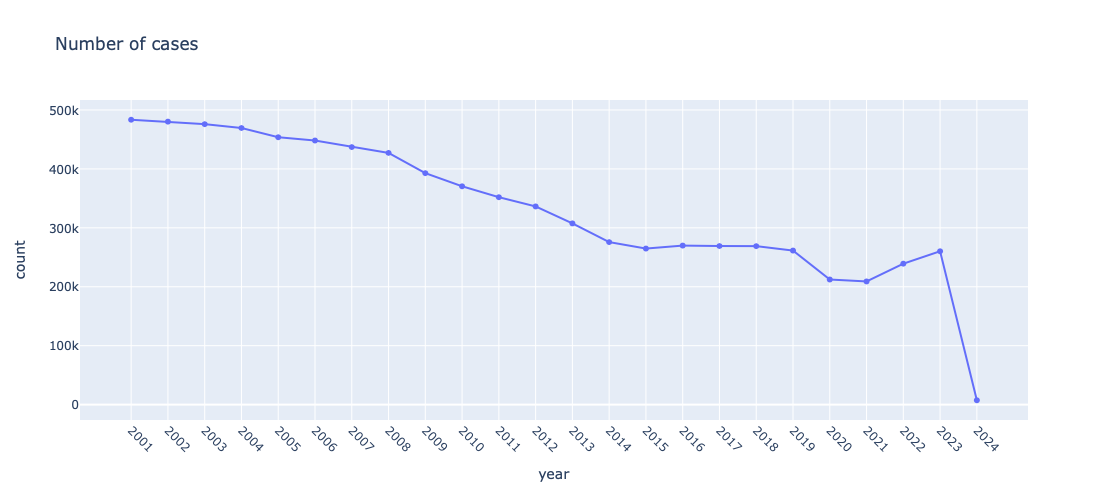

In [55]:
fig=px.line(year_count,x='year',y='count',width=1000,height=500,title='Number of cases',markers=True)
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

The crime has increased in recent years such as from 2021 to 2023 where the count has raised from 209K to 239K and reached 260K.

In [59]:
#common types of crime that residents should be aware of

In [60]:
recent_year_data=data_frame[data_frame['year'].isin([2021,2022,2023])]

In [62]:
recent_year_data.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Arrest,Domestic,Beat,...,Longitude,Location,street_num,street_name,only_sn,address,Only date,month,day,year
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,2515,...,-87.755969,"41.917838056,-87.755968972",20,020 N LARAMIE AVE,N LARAMIE AVE,"2515, N LARAMIE AVE",05/24/2021,5,24,2021
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,True,False,1711,...,-87.713355,"41.995219444,-87.713354912",62,062 N MC CORMICK RD,N MC CORMICK RD,"1711, N MC CORMICK RD",06/26/2021,6,26,2021
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,False,False,1922,...,-87.677975,"41.952345086,-87.677975059",19,019 W BYRON ST,W BYRON ST,"1922, W BYRON ST",11/09/2023,11,9,2023


In [75]:
#getting the most common crime cases
crime_type_count=recent_year_data['Primary Type'].value_counts().reset_index()
crime_type_count.head(15)

,Primary Type,count
0,THEFT,152745
1,BATTERY,125487
2,CRIMINAL DAMAGE,82378
3,ASSAULT,63708
4,MOTOR VEHICLE THEFT,61221
5,DECEPTIVE PRACTICE,50281
6,OTHER OFFENSE,44034
7,ROBBERY,27930
8,WEAPONS VIOLATION,26357
9,BURGLARY,21689


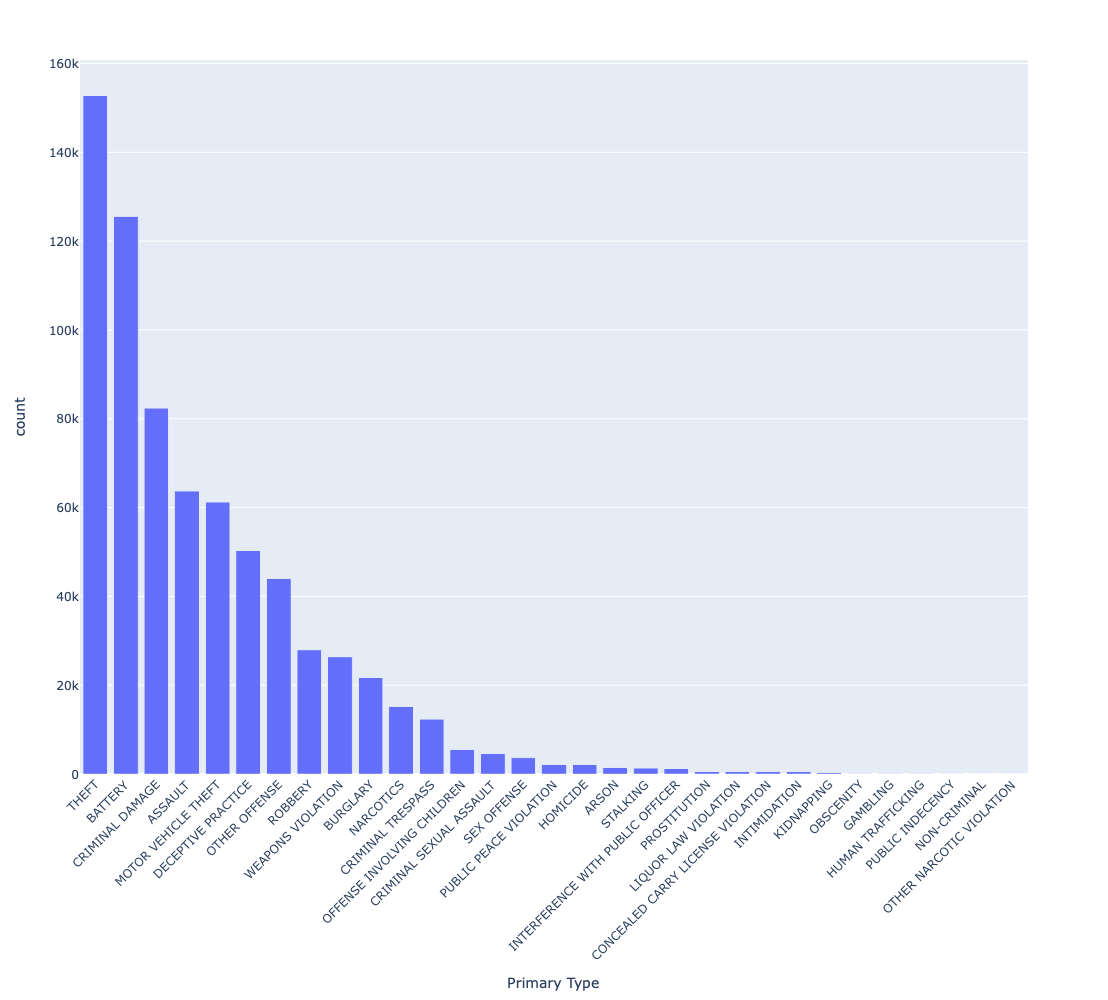

In [73]:
crime_count_fig=px.bar(crime_type_count,x='Primary Type',y='count',width=1000,height=1000)
crime_count_fig.update_layout(xaxis=dict(tickangle=-45))
crime_count_fig.show()

## Time based trends

In [76]:
#are there particular days of the week or time of day that see higher levels of crime

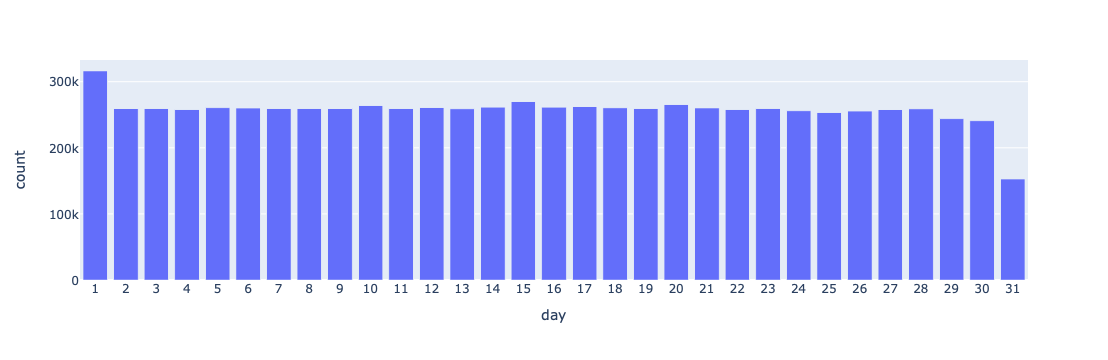

In [86]:
#filter the day by day column
day_count_data=data_frame['day'].value_counts().reset_index().sort_values('day')
day_count_data['day']=day_count_data['day'].astype(str)
day_fig=px.bar(day_count_data,x='day',y='count')
day_fig.show()

In [84]:
#since, 31st repeats rarely throughout the year, the cases count would be low

In [87]:
#Do crime patterns change throughout the year(are there seasonal variations)?